# Challenge:

Sorting out which pages will remain interesting in the long run ('evergreen' pages) and which will quickly become either outdated or irrelevant ('ephemeral' pages)

In [135]:
import pandas as pd
import numpy as np 
import matplotlib
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib.style as style 
%config InlineBackend.figure_format = 'retina'
plt.style.use(style='ggplot')
pd.set_option('display.max_columns', None)  


# Load the Data

In [136]:
train = pd.read_csv('/Users/shuangxu/Documents/Babson-MBA/Spring - 2019/DE&A/Data/stumbleupon.csv')

# Exploring the Data

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
url                               5000 non-null object
urlid                             5000 non-null int64
boilerplate                       5000 non-null object
alchemy_category                  5000 non-null object
alchemy_category_score            5000 non-null object
avglinksize                       5000 non-null float64
commonlinkratio_1                 5000 non-null float64
commonlinkratio_2                 5000 non-null float64
commonlinkratio_3                 5000 non-null float64
commonlinkratio_4                 5000 non-null float64
compression_ratio                 5000 non-null float64
embed_ratio                       5000 non-null float64
framebased                        5000 non-null int64
frameTagRatio                     5000 non-null float64
hasDomainLink                     5000 non-null int64
html_ratio                        5000 non-null float64
image_r

In [138]:
train.drop(['url','boilerplate'], axis=1).describe(include='all', percentiles=[])

,urlid,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
count,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000
unique,NaN,14,3266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,3
top,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,1
freq,NaN,1589,1589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3082,NaN,NaN,3956,NaN,NaN,NaN,NaN,NaN,2548
mean,5276.618800,NaN,NaN,2.769129,0.468496,0.212964,0.091882,0.048684,2.207979,-0.101318,0.0,0.056440,0.021400,0.233716,0.296144,NaN,0.659400,30.144400,NaN,5631.718600,176.000400,4.9560,0.173555,0.100428,NaN
std,3043.369102,NaN,NaN,9.311908,0.201210,0.144541,0.094420,0.071701,5.635399,0.303320,0.0,0.041147,0.144728,0.051525,2.185187,NaN,0.473958,20.446299,NaN,8218.098279,165.253876,3.2171,0.183556,0.074013,NaN
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.0,0.000000,0.000000,0.045564,-1.000000,NaN,0.000000,0.000000,NaN,0.000000,1.000000,0.0000,0.000000,0.000000,NaN
50%,5247.500000,NaN,NaN,2.090909,0.481481,0.202899,0.068966,0.022099,0.483398,0.000000,0.0,0.045856,0.000000,0.230631,0.084237,NaN,1.000000,25.000000,NaN,3483.000000,139.000000,5.0000,0.114931,0.089440,NaN
max,10561.000000,NaN,NaN,363.000000,1.000000,0.982906,0.980392,0.980392,21.000000,0.214286,0.0,0.441700,1.000000,0.716883,113.333333,NaN,1.000000,100.000000,NaN,180020.000000,4990.000000,22.0000,1.000000,1.000000,NaN


### Working with Numeric Features

In [139]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

urlid                               int64
avglinksize                       float64
commonlinkratio_1                 float64
commonlinkratio_2                 float64
commonlinkratio_3                 float64
commonlinkratio_4                 float64
compression_ratio                 float64
embed_ratio                       float64
framebased                          int64
frameTagRatio                     float64
hasDomainLink                       int64
html_ratio                        float64
image_ratio                       float64
lengthyLinkDomain                   int64
linkwordscore                       int64
non_markup_alphanum_characters      int64
numberOfLinks                       int64
numwords_in_url                     int64
parametrizedLinkRatio             float64
spelling_errors_ratio             float64
dtype: object

### Wrangling the non-numeric Features

In [140]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,url,boilerplate,alchemy_category,alchemy_category_score,is_news,news_front_page,label
count,5000,5000,5000,5000,5000,5000,5000
unique,5000,4999,14,3266,2,3,3
top,http://www.insidershealth.com/article/the_real...,"{""title"":""Freebase Pancakes NOTCOT "",""body"":""n...",?,?,1,0,1
freq,1,2,1589,1589,3082,3956,2548


In [141]:
categoricals.head(2)

,url,boilerplate,alchemy_category,alchemy_category_score,is_news,news_front_page,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,1,0,0
1,http://www.popsci.com/technology/article/2012-...,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,1,0,1


##### for alchemy_category, replace "?" with 'unknown"

In [ ]:
train['alchemy_category_score'].value_counts(dropna=False)

In [143]:
train['alchemy_category_score'].value_counts(dropna=False)

?            1589
0.85           49
0.0784091      28
0.849999        9
0.70677         6
0.65146         6
0.535009        6
0.33273         5
0.400001        4
0.4875          4
0.25991         3
0.849997        3
0.287329        3
0.9             3
0.849995        3
0.849798        2
0.330629        2
0.186843        2
0.545005        2
0.849893        2
0.514763        2
0.774267        2
0.719157        2
0.849834        2
0.596372        2
0.844944        2
0.196317        2
0.849963        2
0.57241         2
0.595496        2
             ... 
0.297099        1
0.532963        1
0.802967        1
0.770942        1
0.313276        1
0.423077        1
0.922215        1
0.722518        1
0.655718        1
0.0998839       1
0.916953        1
0.589469        1
0.679138        1
0.601492        1
0.480523        1
0.631597        1
0.562056        1
0.642242        1
0.633208        1
0.531647        1
0.802731        1
0.486351        1
0.318638        1
0.269648        1
0.580728  

In [144]:
train['alchemy_category'].value_counts(dropna=False)

?                     1589
recreation             835
arts_entertainment     650
business               588
health                 328
sports                 255
culture_politics       228
computer_internet      199
science_technology     196
gaming                  55
religion                53
law_crime               17
unknown                  4
weather                  3
Name: alchemy_category, dtype: int64

In [145]:
train['label'].value_counts(dropna=False)

1     2548
0     2451
1?       1
Name: label, dtype: int64

In [146]:
train['is_news'].value_counts(dropna=False)

1    3082
?    1918
Name: is_news, dtype: int64

In [147]:
train['news_front_page'].value_counts(dropna=False)

0    3956
?     849
1     195
Name: news_front_page, dtype: int64

#### Replace all remaining '?' mark with NaN

In [148]:
train = train.replace('?', np.NaN)

In [149]:
train['is_news'].value_counts(dropna=False)

1      3082
NaN    1918
Name: is_news, dtype: int64

In [150]:
train = train.replace('1?', 1)
train['label'] = train['label'].astype('int64')

##### Replace NaN with predicted values 

In [151]:
jcols =['alchemy_category_score','is_news','news_front_page']

In [152]:
train.drop(jcols, axis = 1).columns

Index(['url', 'urlid', 'boilerplate', 'alchemy_category', 'avglinksize',
       'commonlinkratio_1', 'commonlinkratio_2', 'commonlinkratio_3',
       'commonlinkratio_4', 'compression_ratio', 'embed_ratio', 'framebased',
       'frameTagRatio', 'hasDomainLink', 'html_ratio', 'image_ratio',
       'lengthyLinkDomain', 'linkwordscore', 'non_markup_alphanum_characters',
       'numberOfLinks', 'numwords_in_url', 'parametrizedLinkRatio',
       'spelling_errors_ratio', 'label'],
      dtype='object')

In [153]:
icols = ['url', 'urlid', 'boilerplate', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'lengthyLinkDomain',
       'linkwordscore', 'non_markup_alphanum_characters', 'numberOfLinks',
       'numwords_in_url', 'parametrizedLinkRatio', 'spelling_errors_ratio',
       'label']

In [154]:
notnans = train.notnull().all(axis=1)
train_notnans = train[notnans]
X = train_notnans[icols].drop(['url','urlid','boilerplate','label'], axis=1)
y = train_notnans[jcols]

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.75,
                                                    random_state=4)

regr_multirf = MultiOutputRegressor(RandomForestRegressor(max_depth=30,
                                                          random_state=0))

# Fit on the train data
regr_multirf.fit(X_train, y_train)

# Check the prediction score
score = regr_multirf.score(X_test, y_test)
print("The prediction score on the test data is {:.2f}%".format(score*100))

The prediction score on the test data is 55.67%


In [156]:
train_nans = train.loc[~notnans].copy()
train_nans[jcols] = regr_multirf.predict(train_nans[icols].drop(['url','urlid','boilerplate','label'], axis=1)) 

In [157]:
train = train_nans.copy()

##### for alchemy_category, replace null with 'Unknown'

In [158]:
train['alchemy_category'] = train['alchemy_category'].fillna('Unknown')

#### Transform data type

In [159]:
train[['is_news','news_front_page']] = train[['is_news','news_front_page',]].astype('int64')
train[['alchemy_category_score']] = train[['alchemy_category_score']].astype('float64')

### Correlations of Numeric Features

In [190]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['label'].sort_values(ascending=False)[:8], '\n')
print (corr['label'].sort_values(ascending=False)[-8:])

label                             1.000000
numberOfLinks                     0.118022
commonlinkratio_3                 0.108004
alchemy_category_score            0.103876
non_markup_alphanum_characters    0.096160
commonlinkratio_1                 0.092473
commonlinkratio_2                 0.087582
commonlinkratio_4                 0.086655
Name: label, dtype: float64 

hasDomainLink           -0.020277
spelling_errors_ratio   -0.045828
html_ratio              -0.066350
compression_ratio       -0.072937
linkwordscore           -0.151365
frameTagRatio           -0.195283
framebased                    NaN
is_news                       NaN
Name: label, dtype: float64


[MLENS] backend: threading


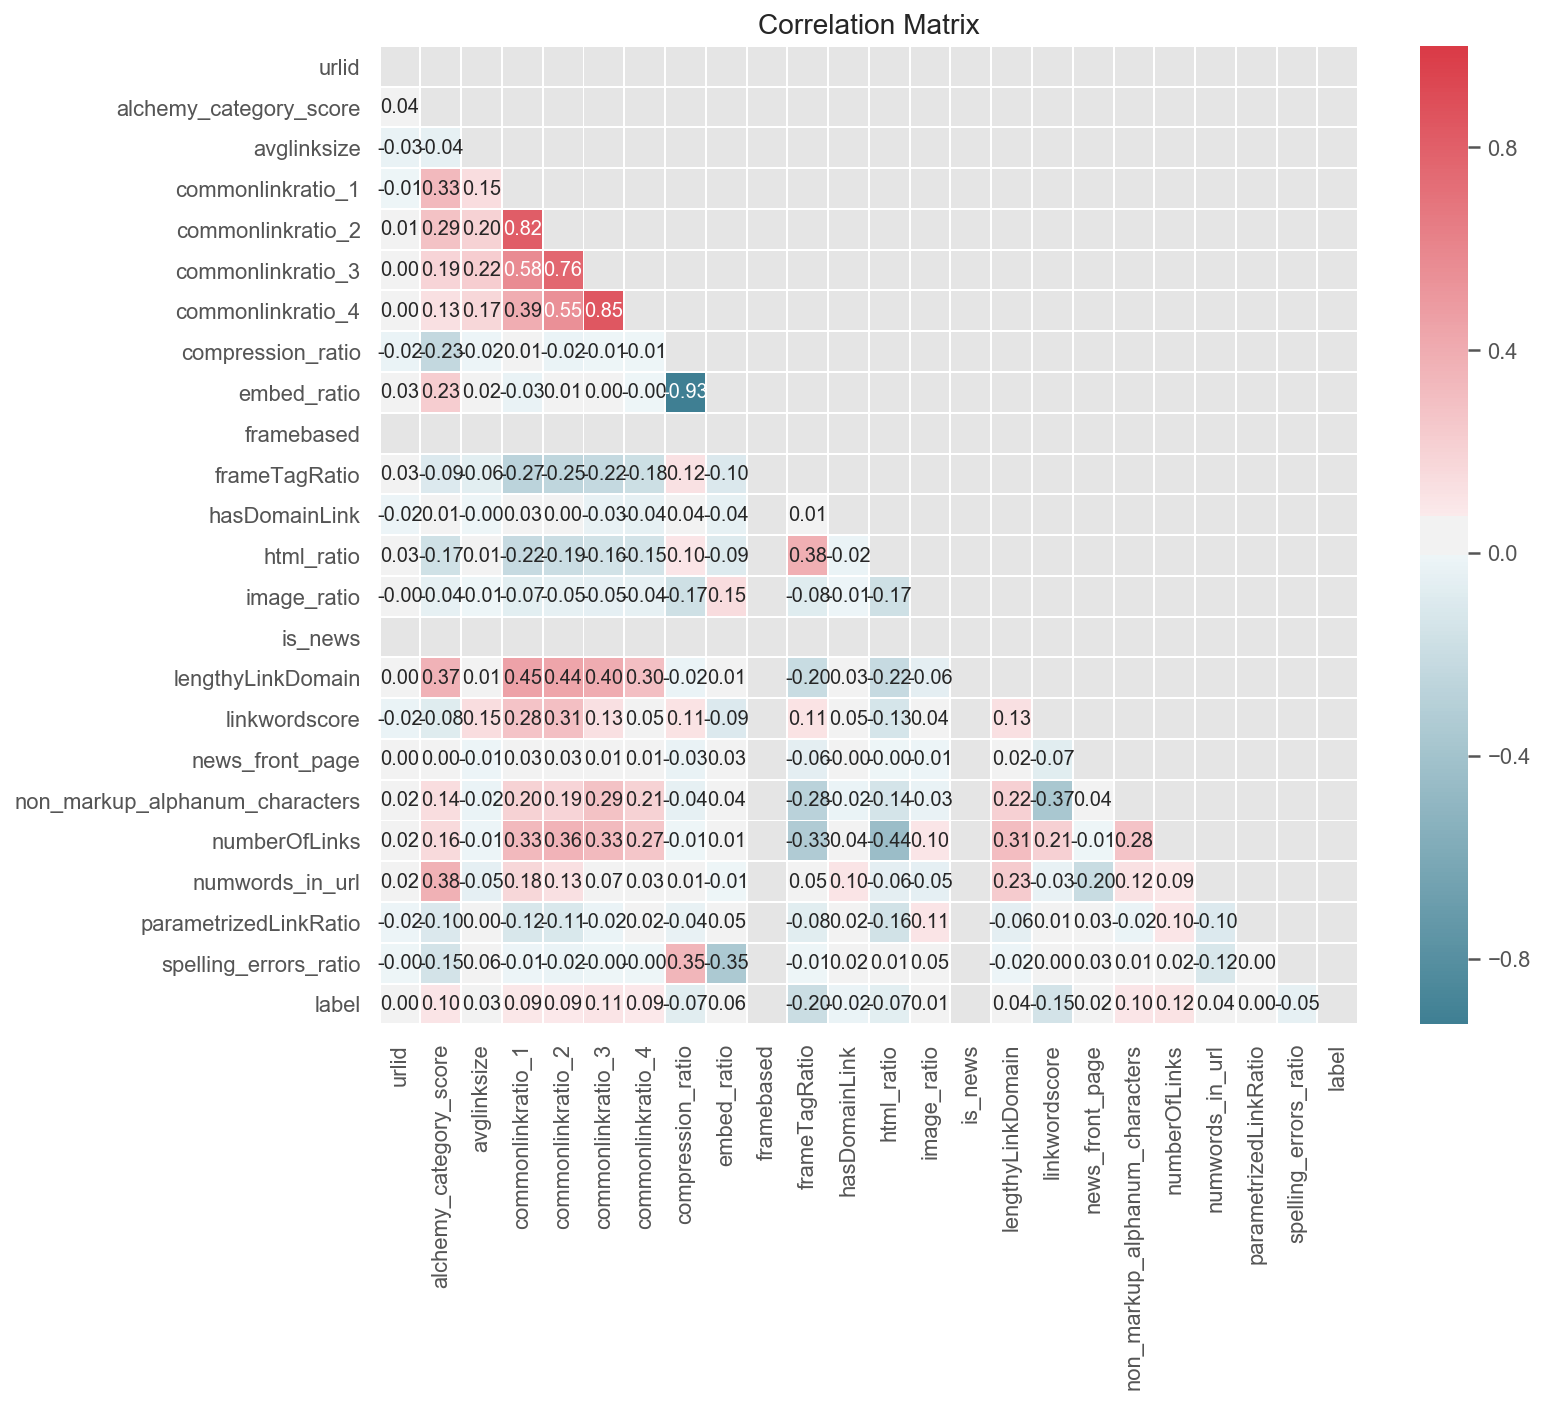

In [168]:
from mlens.visualization import corrmat

corrmat(train.corr(), inflate=False)
plt.show()

### Missing Value

In [161]:
def draw_missing_data_table(df1):
    total_1 = df1.isnull().sum().sort_values(ascending=False)
    percent_1 = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total_1, percent_1], axis=1, keys=['Missing in train', 'Percent of train'])
    return missing_data

draw_missing_data_table(train)

,Missing in train,Percent of train
label,0,0.0
framebased,0,0.0
urlid,0,0.0
boilerplate,0,0.0
alchemy_category,0,0.0
alchemy_category_score,0,0.0
avglinksize,0,0.0
commonlinkratio_1,0,0.0
commonlinkratio_2,0,0.0
commonlinkratio_3,0,0.0


### Explore Numeric Values

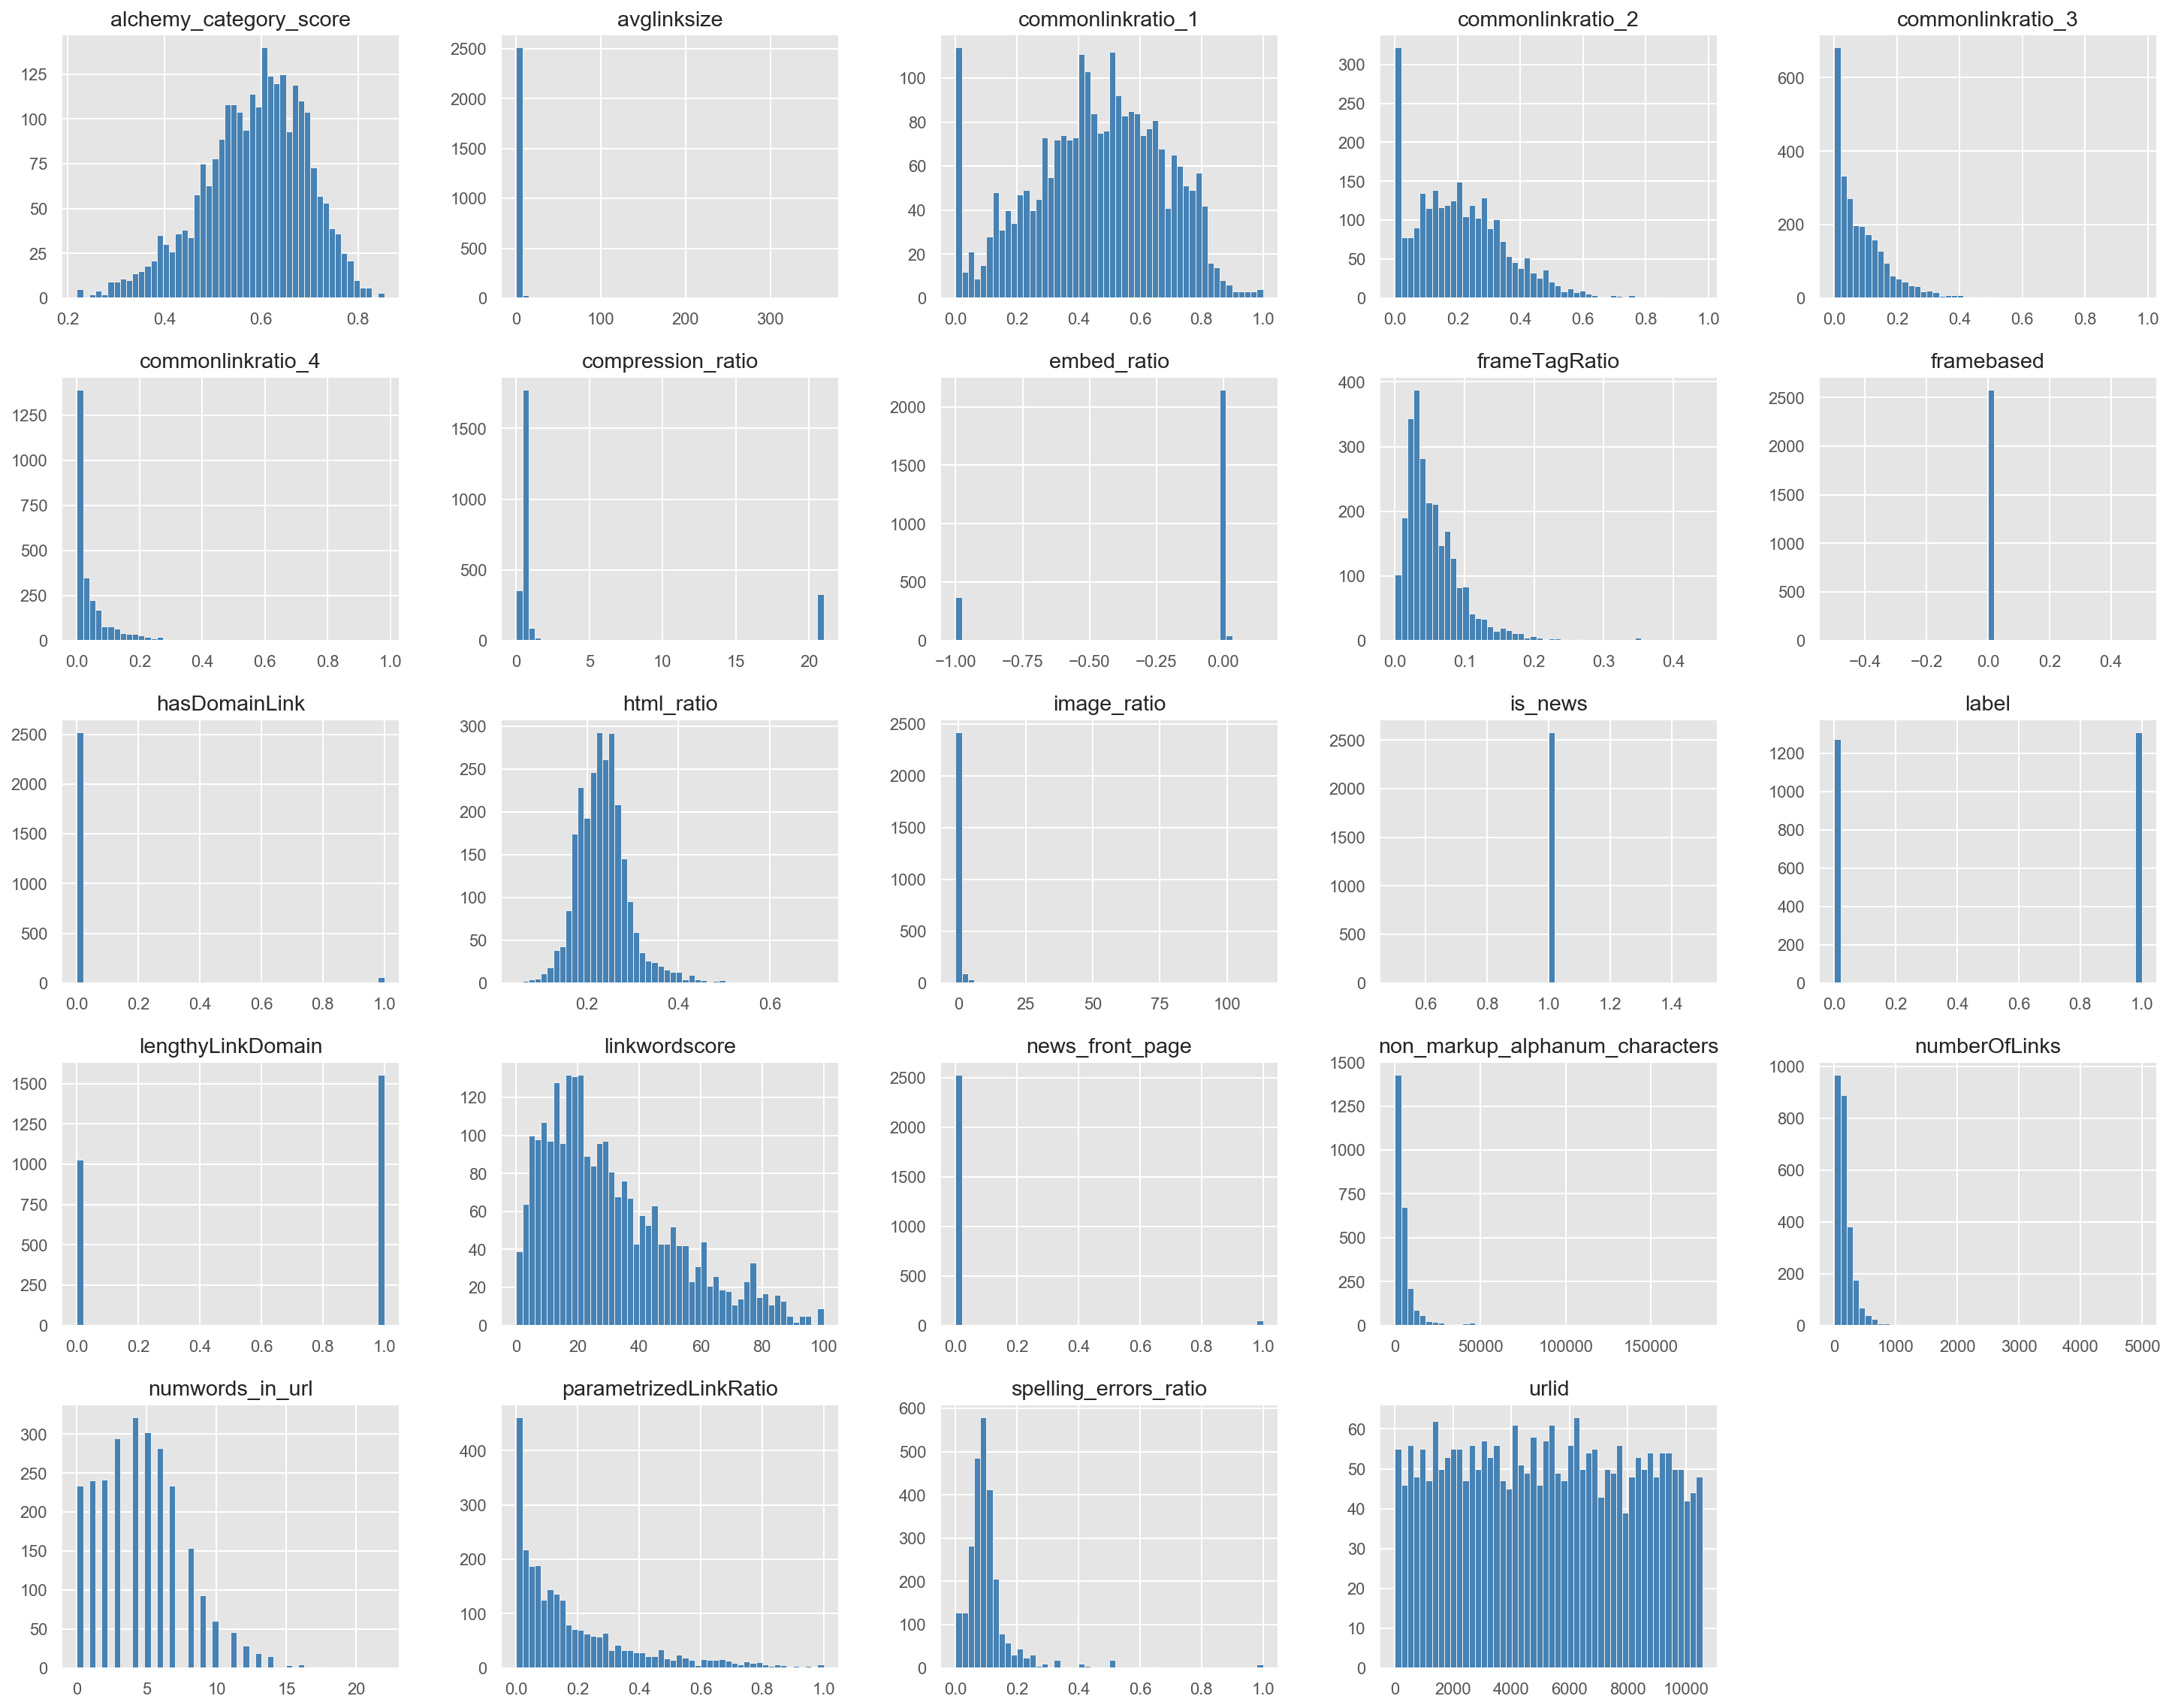

In [162]:
train.hist(bins=50, figsize=(25,20),color='steelblue')
plt.show()

In [163]:
pd.DataFrame.skew(train, axis=0)

urlid                              0.029037
alchemy_category_score            -0.470481
avglinksize                       19.067926
commonlinkratio_1                 -0.253748
commonlinkratio_2                  0.766244
commonlinkratio_3                  2.264316
commonlinkratio_4                  3.522815
compression_ratio                  2.229773
embed_ratio                       -2.021688
framebased                         0.000000
frameTagRatio                      2.357646
hasDomainLink                      6.390112
html_ratio                         1.104121
image_ratio                       28.562204
is_news                            0.000000
lengthyLinkDomain                 -0.419710
linkwordscore                      0.888107
news_front_page                    7.132300
non_markup_alphanum_characters     6.532674
numberOfLinks                      9.038808
numwords_in_url                    0.744195
parametrizedLinkRatio              1.586047
spelling_errors_ratio           

In [169]:
train.drop(['url','urlid','boilerplate'], axis=1).head(10)

,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,compression_ratio,embed_ratio,framebased,frameTagRatio,hasDomainLink,html_ratio,image_ratio,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
5,Unknown,0.498607,119.000000,0.745455,0.581818,0.290909,0.018182,0.434639,0.000000,0,0.019841,0,0.298300,0.038636,1,0,12,0,4368,55,3,0.054545,0.087356,0
7,Unknown,0.634681,1.883333,0.719697,0.265152,0.113636,0.015152,0.499348,0.000000,0,0.026616,0,0.173746,0.025830,1,0,5,0,27656,132,4,0.068182,0.148551,0
8,Unknown,0.682251,0.471503,0.190722,0.036082,0.000000,0.000000,0.383199,0.000000,0,0.021705,0,0.114962,1.136646,1,0,17,0,2471,194,7,0.644330,0.125000,1
9,Unknown,0.680571,2.410112,0.469325,0.101227,0.018405,0.003067,0.465859,0.000000,0,0.012000,0,0.205117,0.206262,1,1,14,0,11459,326,4,0.236196,0.094412,1
11,sports,0.717200,4.986111,0.640000,0.426667,0.320000,0.293333,0.521064,0.004065,0,0.162690,0,0.246912,0.060976,1,1,40,0,2701,75,8,0.186667,0.115385,0
13,Unknown,0.602563,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,-1.000000,0,0.057692,0,0.328344,-1.000000,1,0,0,0,4091,5,11,0.000000,0.083333,1
14,recreation,0.683697,2.299492,0.547414,0.206897,0.056034,0.017241,0.473965,0.000000,0,0.078431,1,0.205379,0.036424,1,1,37,0,3610,232,11,0.215517,0.080205,0
15,recreation,0.713684,0.990431,0.522523,0.108108,0.009009,0.000000,0.414155,0.000000,0,0.054993,0,0.189933,0.075630,1,0,54,0,883,222,4,0.013514,0.059603,0
21,recreation,0.617088,2.033333,0.516129,0.172043,0.043011,0.000000,0.909836,0.000000,0,0.105578,0,0.229414,0.863636,1,1,31,0,1927,93,5,0.043011,0.078947,1
22,health,0.537505,1.333333,0.000000,0.000000,0.000000,0.000000,0.468310,0.000000,0,0.041262,0,0.168818,0.062963,1,0,3,0,1766,11,2,0.090909,0.084175,0


### is_news vs. label

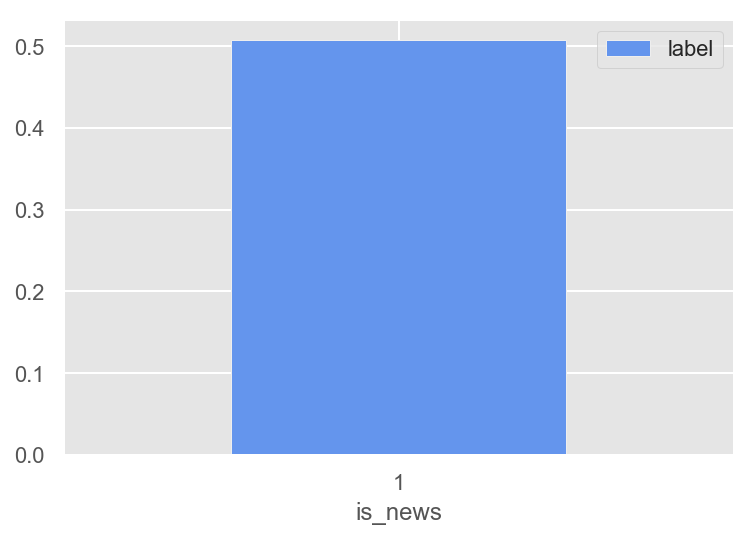

In [170]:
is_news_pivot = train.pivot_table(index="is_news",values="label")
is_news_pivot.plot.bar(rot=0, color = 'cornflowerblue')
plt.show()

### news_front_page vs. label

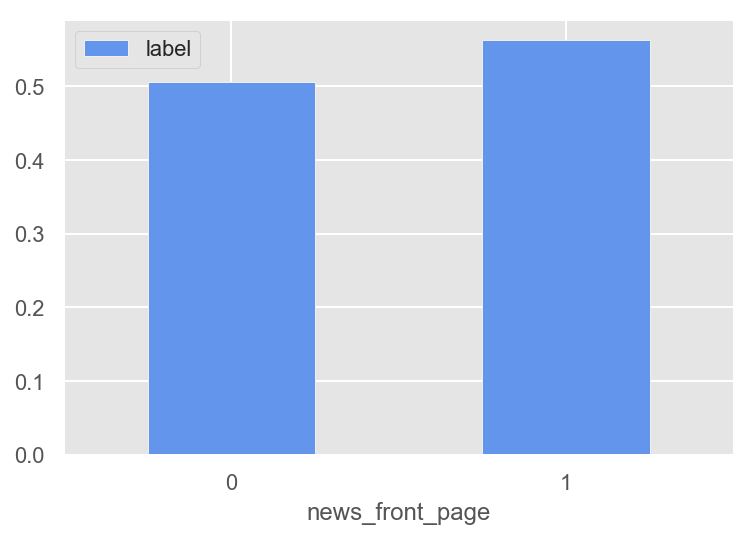

In [171]:
news_front_page_pivot = train.pivot_table(index="news_front_page",values="label")
news_front_page_pivot.plot.bar(rot=0, color = 'cornflowerblue')
plt.show()

### lengthyLinkDomain vs. label

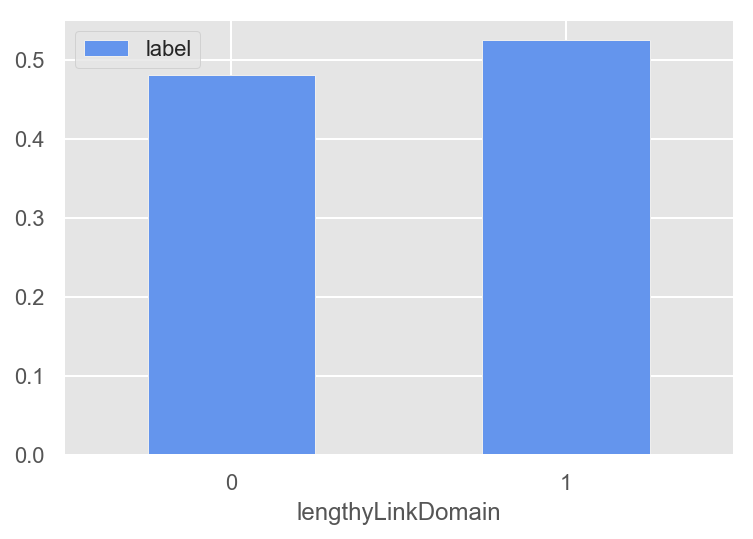

In [173]:
lengthyLinkDomain_pivot = train.pivot_table(index="lengthyLinkDomain",values="label")
lengthyLinkDomain_pivot.plot.bar(rot=0, color = 'cornflowerblue')
plt.show()

### Explore Non-numeric Values

### alchemy_category vs. label

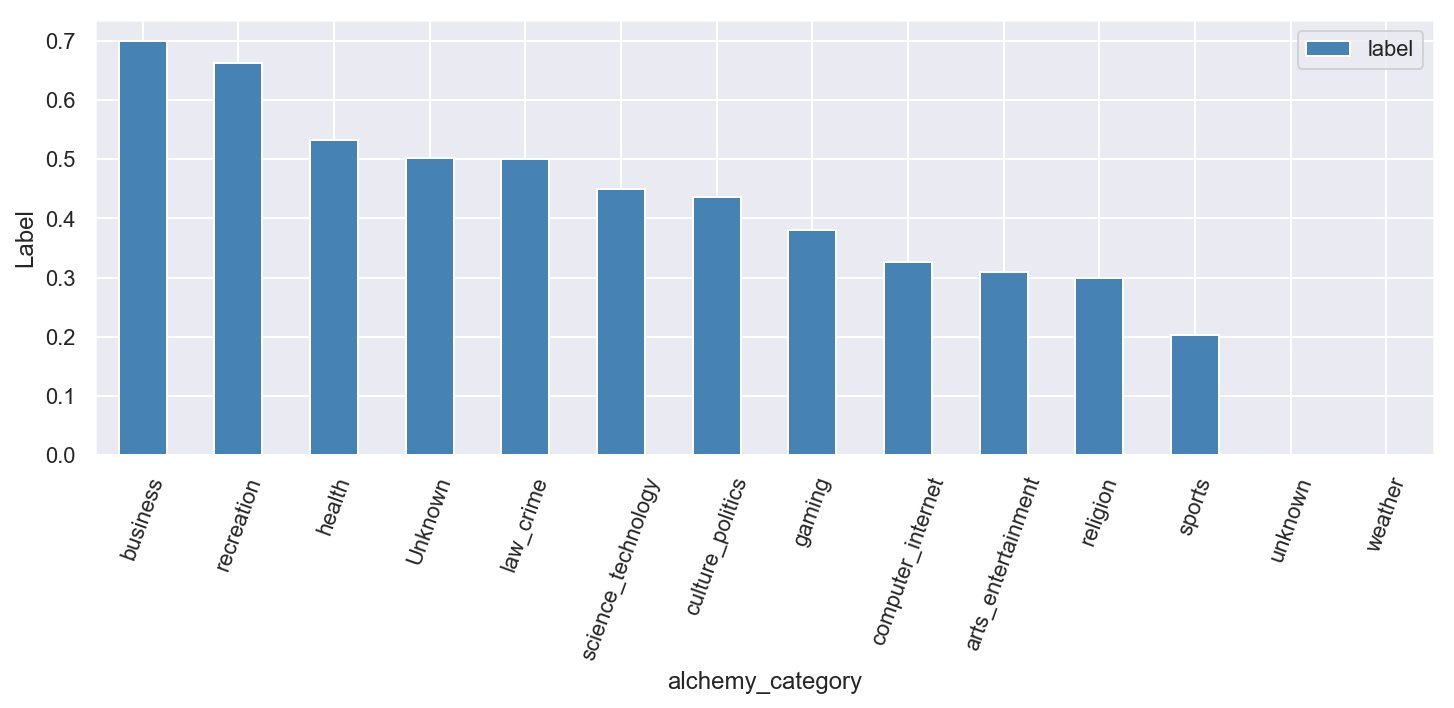

In [185]:
sns.set(rc={'figure.figsize':(12, 4)})
alchemy_category_pivot = train.pivot_table(index="alchemy_category",values="label").sort_values('label',ascending=False)
alchemy_category_pivot.plot.bar(rot=70, color = 'steelblue')
plt.ylabel('Label')
plt.show()

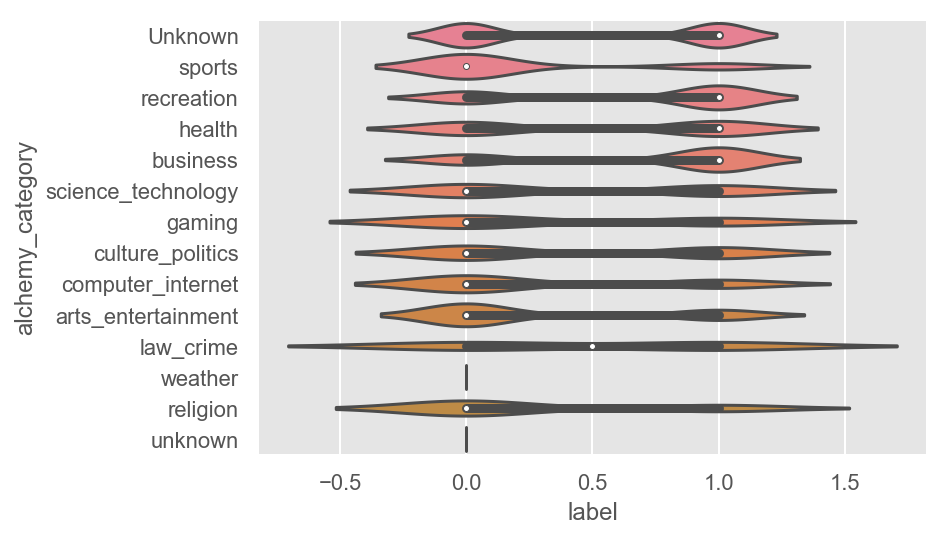

In [174]:
ax = sns.violinplot(x=train["label"], y = train["alchemy_category"] ,gridsize=300,width=0.8)

<Figure size 864x288 with 0 Axes>

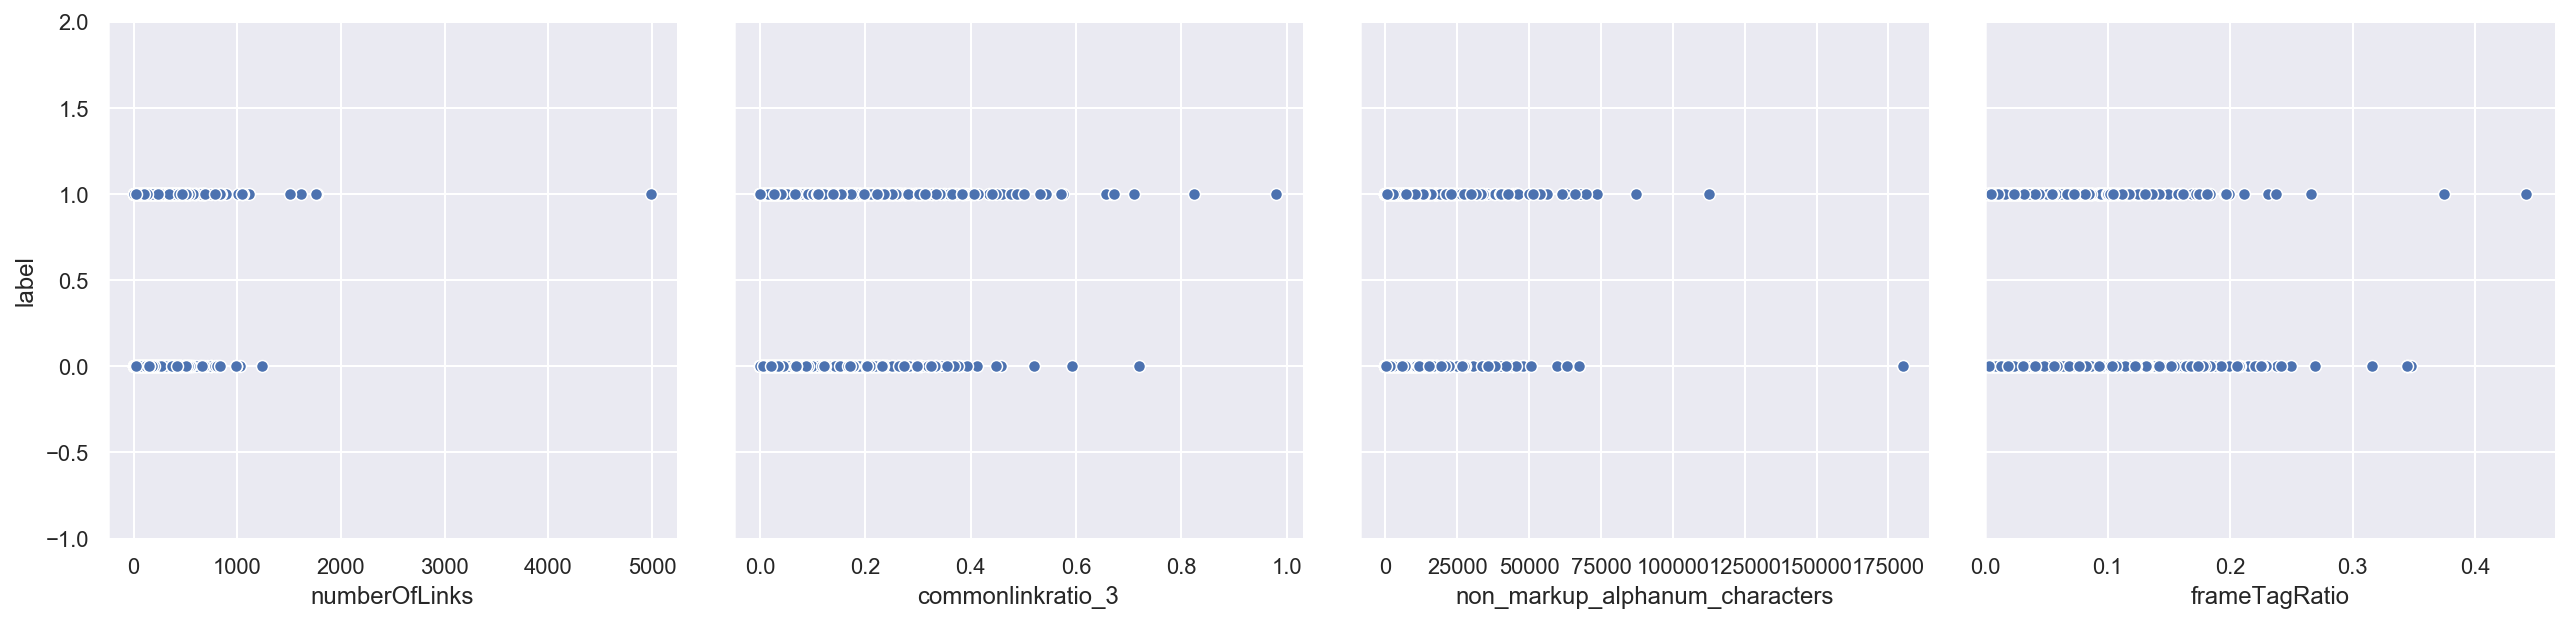

In [192]:
plt.figure()
sns.set(style="darkgrid", color_codes=True)
sns.pairplot(train[['label','numberOfLinks','commonlinkratio_3','non_markup_alphanum_characters','frameTagRatio']],
             y_vars=['label'],
             x_vars=['numberOfLinks','commonlinkratio_3','non_markup_alphanum_characters','frameTagRatio'], size = 4.5)
plt.ylim(-1, 2)
plt.xlim(0, None)
plt.show()

It seems that from above people are more interested in websites that don’t have many images and have low frame presence. 

## Feature Engineering

In [195]:
train.select_dtypes(include=[np.number]).columns

Index(['urlid', 'alchemy_category_score', 'avglinksize', 'commonlinkratio_1',
       'commonlinkratio_2', 'commonlinkratio_3', 'commonlinkratio_4',
       'compression_ratio', 'embed_ratio', 'framebased', 'frameTagRatio',
       'hasDomainLink', 'html_ratio', 'image_ratio', 'is_news',
       'lengthyLinkDomain', 'linkwordscore', 'news_front_page',
       'non_markup_alphanum_characters', 'numberOfLinks', 'numwords_in_url',
       'parametrizedLinkRatio', 'spelling_errors_ratio', 'label'],
      dtype='object')

### minmax_scale

In [194]:
from sklearn.preprocessing import minmax_scale

columns = train.drop(['urlid','url','boilerplate','alchemy_category','label'], axis=1).columns

for col in columns:
    train[col] = minmax_scale(train[col])

### Correlation

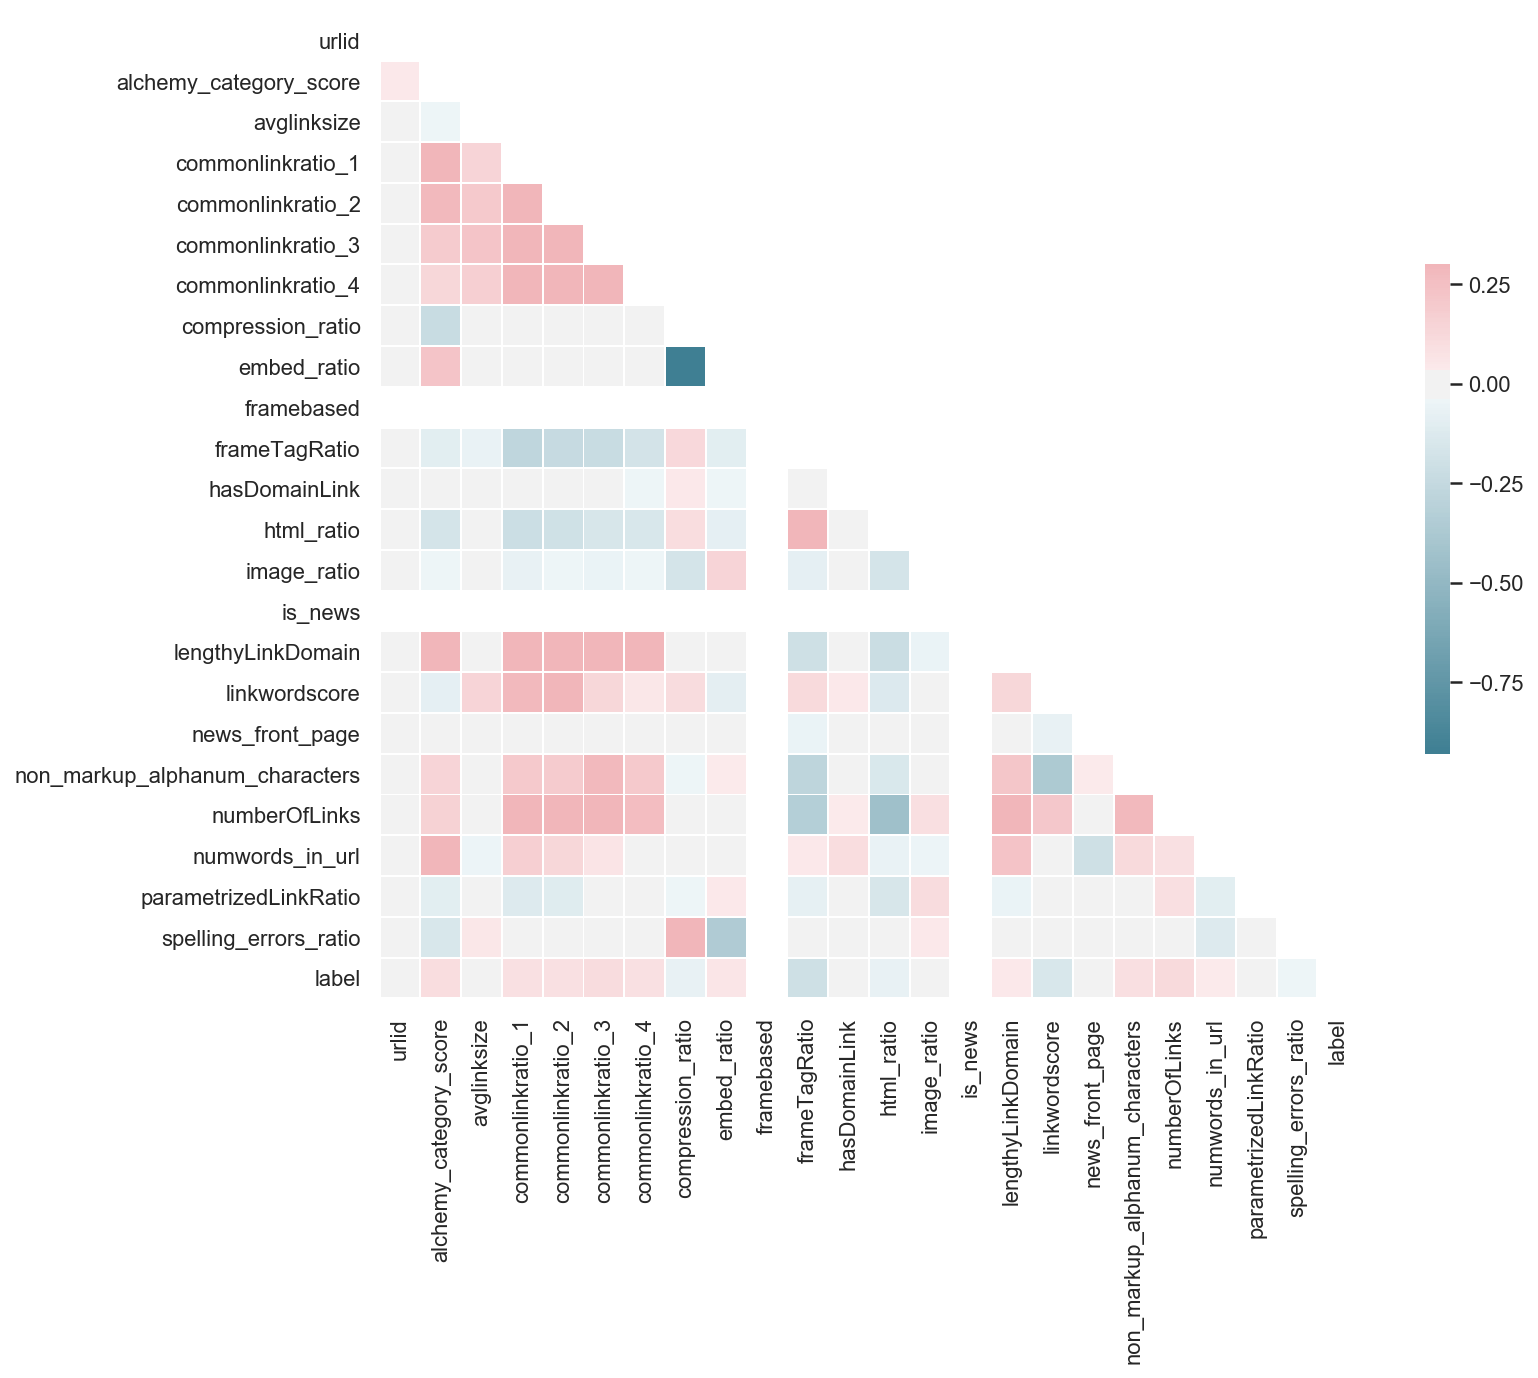

In [196]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(12, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()

plot_correlation_heatmap(train)

# Modeling 

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

##  Method 1 - Logic and RF

In [198]:
def select_model(df,features):
    
    train_copy = train.copy()
    all_X = train_copy.drop(['urlid','url','boilerplate','alchemy_category','label'], axis=1)
    all_y = train_copy['label']

    # List of dictionaries, each containing a model name,
    # it's estimator and a dict of hyperparameters
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "solver": ["liblinear"],
                    'penalty': ['l1','l2'],
                    'C': [0.1,2,20],
                    'class_weight': [None, 'balanced'],
                    'intercept_scaling': [2,1],
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [4, 6, 9],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2, 5, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
    ]

    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(all_X,all_y)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

cols = train.drop(['urlid','url','boilerplate','alchemy_category','label'], axis=1).columns
result = select_model(train,cols)

LogisticRegression
------------------
Best Score: 0.6219984508133231
Best Parameters: {'C': 20, 'class_weight': 'balanced', 'intercept_scaling': 2, 'penalty': 'l1', 'solver': 'liblinear'}

RandomForestClassifier
----------------------
Best Score: 0.6440743609604958
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}



## Method 2 -Ensemble

In [49]:
SEED = 222
train_copy = train.copy()
X = train_copy.drop(['urlid','url','boilerplate','alchemy_category','label'], axis=1)
y = train_copy['label']
xtrain, xtest, ytrain, ytest = train_test_split(
                          X, y, random_state=42, test_size=.33)

In [54]:
# A host of Scikit-learn models
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

def get_models():
    """Generate a library of base learners."""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=SEED)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)

    models = {'svm': svc,
              'knn': knn,
              'naive bayes': nb,
              'mlp-nn': nn,
              'random forest': rf,
              'gbm': gb,
              'logistic': lr,
              }

    return models

def train_predict(model_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

def score_models(P, y):
    """Score model in prediction DF"""
    print("Scoring models.")
    for m in P.columns:
        score = roc_auc_score(y, P.loc[:, m])
        print("%-26s: %.3f" % (m, score))
    print("Done.\n")

In [55]:
models = get_models()
P = train_predict(models)
score_models(P, ytest)

Fitting models.
svm... done
knn... done
naive bayes... done
mlp-nn... done
random forest... done
gbm... done
logistic... done
Done.

Scoring models.
svm                       : 0.693
knn                       : 0.644
naive bayes               : 0.623
mlp-nn                    : 0.703
random forest             : 0.673
gbm                       : 0.721
logistic                  : 0.660
Done.



[MLENS] backend: threading


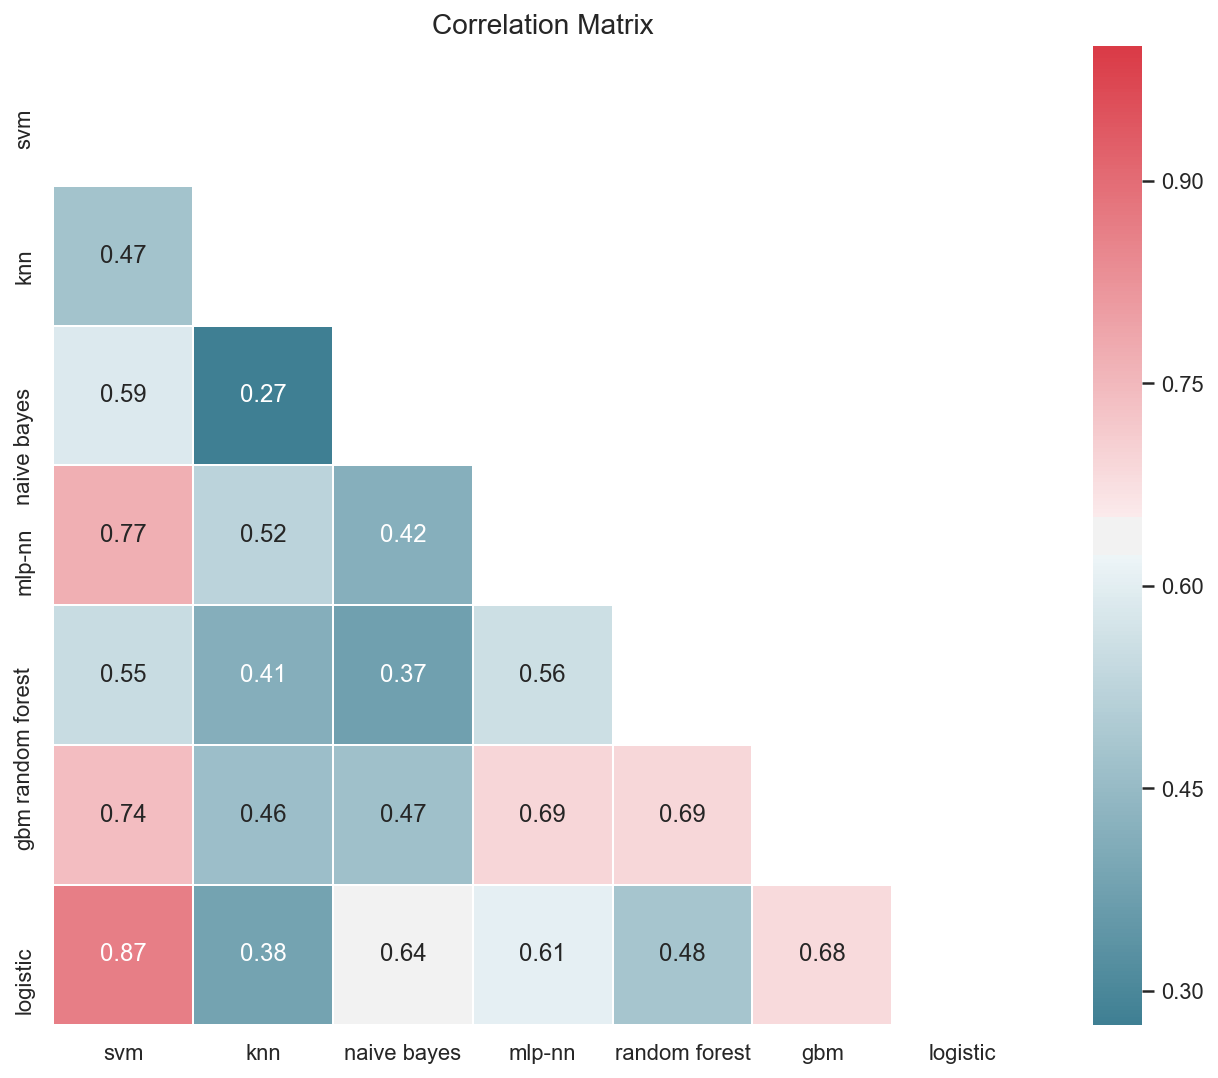

In [56]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)
plt.show()

In [57]:
print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(ytest, P.mean(axis=1)))

Ensemble ROC-AUC score: 0.720


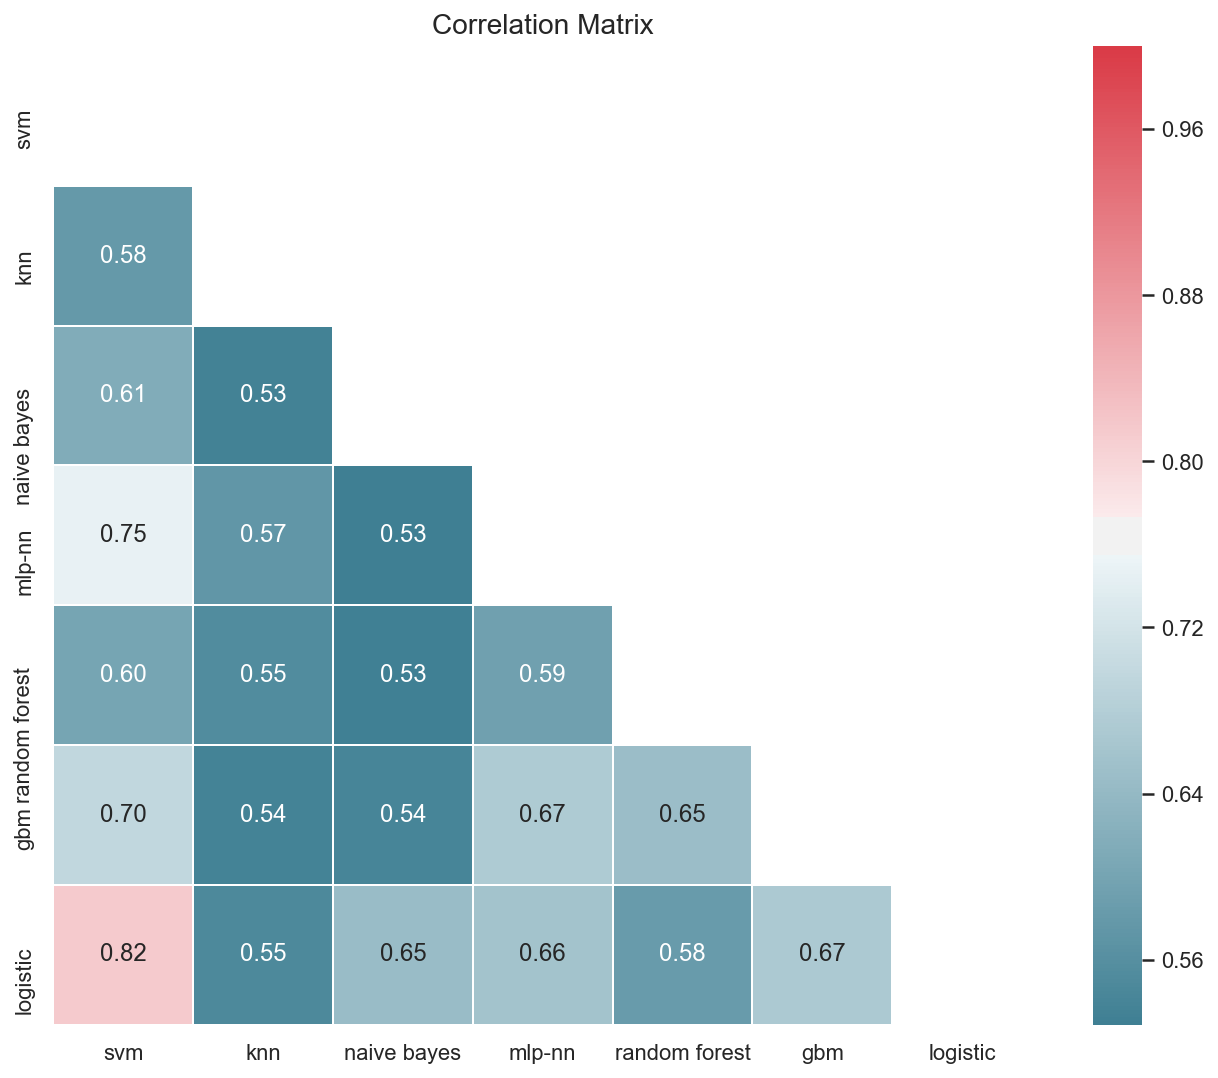

In [58]:
corrmat(P.apply(lambda pred: 1*(pred >= 0.5) - ytest.values).corr(), inflate=False)
plt.show()

In [59]:
print("Ensemble ROC-AUC score: %.3f" % roc_auc_score(ytest, P.mean(axis=1)))

Ensemble ROC-AUC score: 0.720


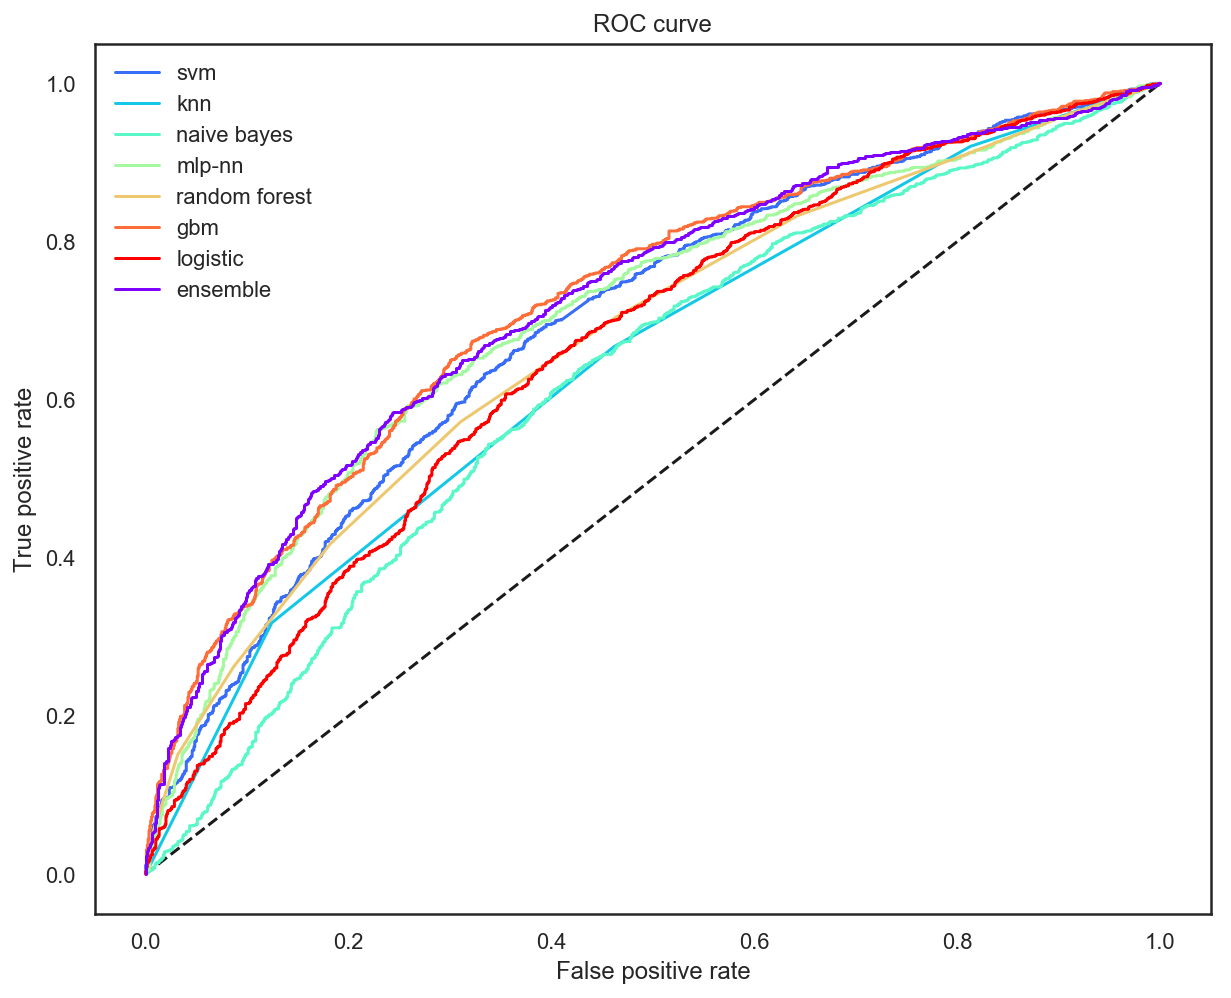

In [60]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ytest, P_base_learners, P_ensemble, labels, ens_label):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')

    cm = [plt.cm.rainbow(i)
      for i in np.linspace(0, 1.0, P_base_learners.shape[1] + 1)]

    for i in range(P_base_learners.shape[1]):
        p = P_base_learners[:, i]
        fpr, tpr, _ = roc_curve(ytest, p)
        plt.plot(fpr, tpr, label=labels[i], c=cm[i + 1])

    fpr, tpr, _ = roc_curve(ytest, P_ensemble)
    plt.plot(fpr, tpr, label=ens_label, c=cm[0])

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(frameon=False)
    plt.show()

plot_roc_curve(ytest, P.values, P.mean(axis=1), list(P.columns), "ensemble")

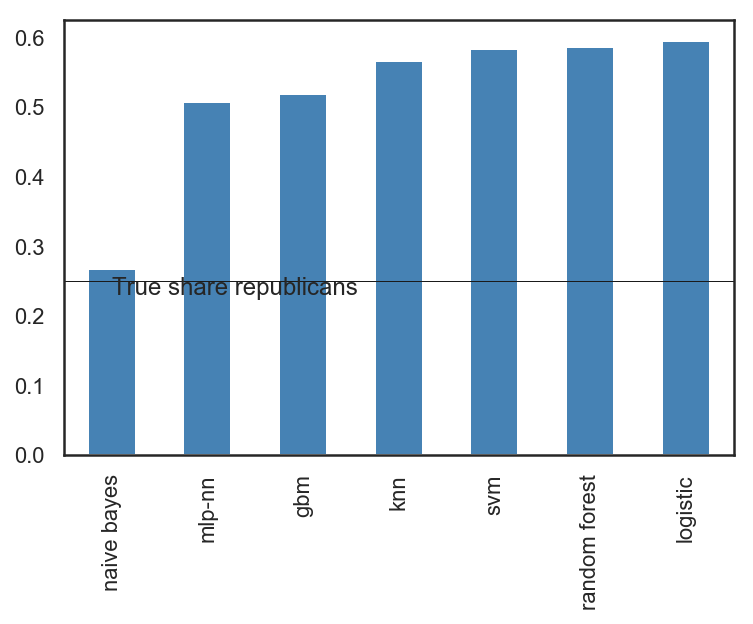

In [61]:
p = P.apply(lambda x: 1*(x >= 0.5).value_counts(normalize=True))
p.index = ["DEM", "REP"]
p.loc["REP", :].sort_values().plot(kind="bar", color = 'steelblue')
plt.axhline(0.25, color="k", linewidth=0.5)
plt.text(0., 0.23, "True share republicans")
plt.show()

## Method 3 - Text Analysis

In [106]:
import numpy as np
from sklearn import metrics,preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.linear_model as lm
import pandas as pd
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [107]:
#beating the benchmark @StumbleUpon Evergreen Challenge
# __author__ : Abhishek Thakur
# -*- coding: utf-8 -*-

In [135]:
loadData = lambda f: np.genfromtxt(open(f,'r'), delimiter=' ')

In [158]:
x_train = list(np.array(pd.read_table('/Users/shuangxu/Documents/Data Set/stumbleupon/train.tsv'))[:,2])
x_test = list(np.array(pd.read_table('/Users/shuangxu/Documents/Data Set/stumbleupon/test.tsv'))[:,2])
y_train = list(np.array(pd.read_table('/Users/shuangxu/Documents/Data Set/stumbleupon/train.tsv'))[:,-1])
testfile = pd.read_csv('/Users/shuangxu/Documents/Data Set/stumbleupon/test.tsv', sep="\t", na_values=['?'])
y_test = np.array(testfile.iloc[:,-1])


In [137]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, strip_accents='unicode',  
        analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1)

In [138]:
rd = lm.LogisticRegression(penalty='l2', dual=True, tol=0.0001, 
                             C=1, fit_intercept=True, intercept_scaling=1.0, 
                             class_weight=None, random_state=None)

In [141]:
X_all = x_train + x_test
lentrain = len(x_train)
lentrain

7395

In [142]:
#fitting pipeline
tfv.fit(X_all)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=1,
        stop_words=None, strip_accents='unicode', sublinear_tf=1,
        token_pattern='\\w{1,}', tokenizer=None, use_idf=1,
        vocabulary=None)

In [143]:
# transforming data
X_all = tfv.transform(X_all)
X_all

<10566x238446 sparse matrix of type '<class 'numpy.float64'>'
	with 4757282 stored elements in Compressed Sparse Row format>

In [132]:
X = X_all[:lentrain] # 7395 of 10566 rows~ new X_train
X

<7395x238446 sparse matrix of type '<class 'numpy.float64'>'
	with 3327030 stored elements in Compressed Sparse Row format>

In [133]:
X_test = X_all[lentrain:] # the remaining 3171 rows
X_test 

<3171x238446 sparse matrix of type '<class 'numpy.float64'>'
	with 1430252 stored elements in Compressed Sparse Row format>

In [146]:
print ("20 Fold CV Score: ", np.mean(cross_val_score(rd, X, y_train, cv=20, scoring='roc_auc')))

20 Fold CV Score:  0.8771223762342266


In [161]:
# training on full data"
rd.fit(X,y_train)
pred = rd.predict_proba(X)[:,1]

In [156]:
pred

array([0.86116314, 0.20918986, 0.36713351, ..., 0.77026608, 0.72491164,
       0.82480302])

In [154]:
y_test

array([0.08059701, 0.17647059, 0.125     , ..., 0.11764706, 0.11196562,
       0.13002364])

In [163]:
# Evaluation
fpr, tpr, thresholds = metrics.roc_curve(y_train, pred, pos_label=1)
auc = metrics.auc(fpr,tpr)
auc

0.9582000298057269

## Method 4 - Another Text analysis

In [165]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [166]:
x_train = list(np.array(pd.read_table('/Users/shuangxu/Documents/Data Set/stumbleupon/train.tsv'))[:,2])
y_train = list(np.array(pd.read_table('/Users/shuangxu/Documents/Data Set/stumbleupon/train.tsv'))[:,-1])

In [168]:
pipe = make_pipeline(TfidfVectorizer(min_df=3,  max_features=None, strip_accents='unicode',
                             analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 2), use_idf=1,
                             smooth_idf=1,sublinear_tf=1),
                     LogisticRegression(penalty='l2', dual=True, tol=0.0001, 
                             C=1, fit_intercept=True, intercept_scaling=1.0, 
                             class_weight=None, random_state=None))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.81


In [170]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset:
x_train = vectorizer.transform(x_train)
# find maximum value for each of the features over dataset:
max_value = x_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['widget wid' 'username gossipberry' 'shawty track' 'shawty user'
 '73n5jd7' 'local ad' 'user gossipberry' 'shawty username' 'no qs'
 'userwidget' 'buzzfeed uo' 'com andrewrhg' 'com gossipberry'
 'tracking snookis' 'phone track' 'phone user' 'phone username' '73n2t67'
 'usa username' 'user andrewrhg']
Features with highest tfidf: 
['494' 'parenting' 'this is' 'manly' 'ella' 'some funny' 'newstarget'
 'title recipe' 'wang' 'fi' 'org title' 'cn' 'olaf' 'cnbc' 'doghouse'
 'body url' 'title body' 'us' 'welcome' 'menswear']


In [171]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['body' 'title' 'url' 'the' 'and' 'a' 'to' 'of' 'in' 'for' 'is' 'with'
 'on' 's' 'it' 'this' 'you' 'that' 'from' 'or' 'at' 'are' 'of the' 'be'
 'in the' 'by' 'as' 'have' 'all' 'but' 'can' 'your' 't' 'more' 'an' 'one'
 'i' 'if' 'about' 'not' 'up' 'out' 'so' '1' 'like' 'just' 'into' '2'
 'make' 'they' 'when' 'in a' 'will' 'was' 'time' 'to the' 'some' 'on the'
 'over' 'has' 'what' 'we' '3' 'these' 'my' 'get' '4' 'them' 'do' 'it s'
 'there' 'how' 'also' 'then' 'with a' 'other' 'if you' 'for the' 'which'
 'well' 'recipe' 'than' 'no' 'until' 'new' 'with the' 'minutes' 'you can'
 'use' '10' 'from the' 'don' 'their' 'is a' 'even' 'here' 'don t' 'most'
 '5' 'who']


### Investigating model coefficients

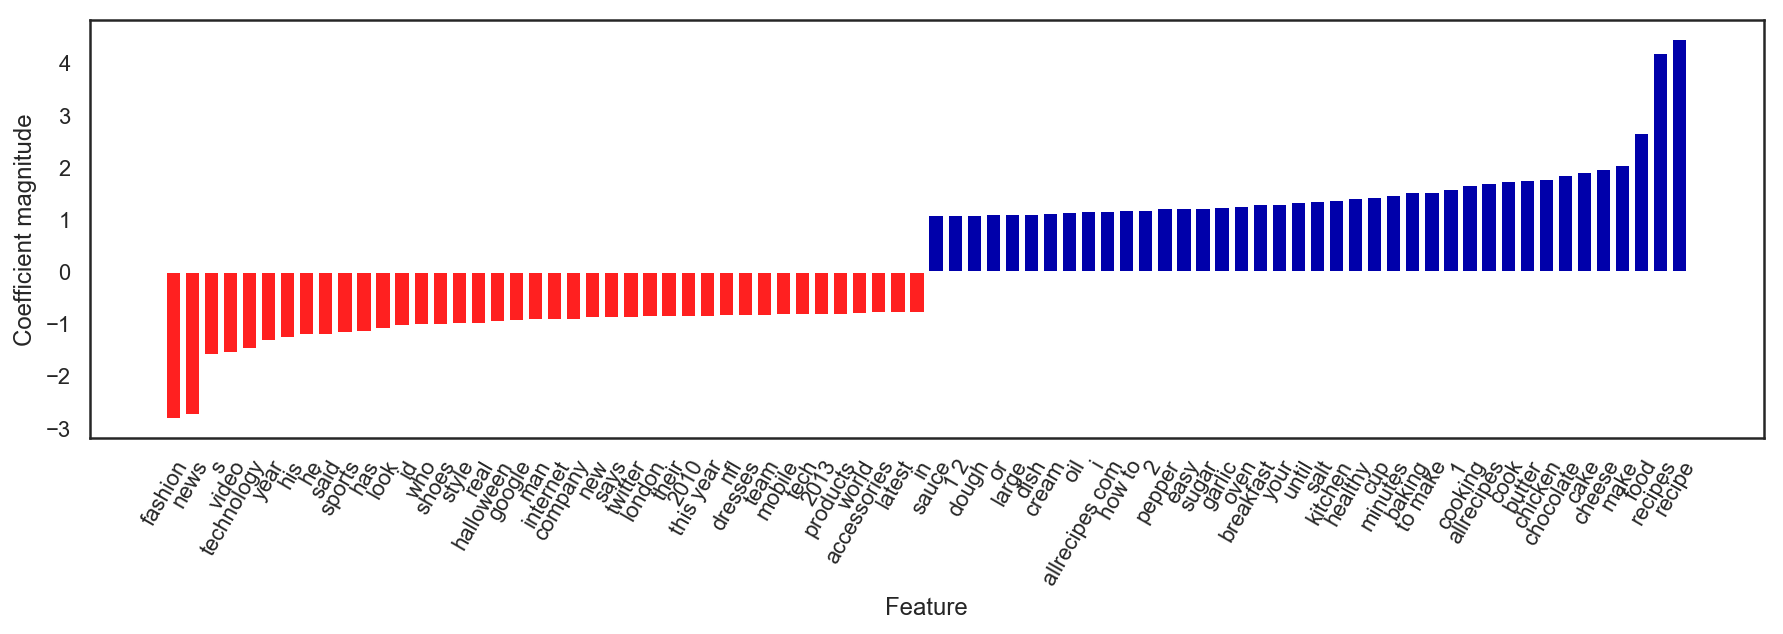

In [181]:
import mglearn
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

# Others

#### Logistic Regression

In [ ]:
log = LogisticRegression()

search_parameters = {
    'penalty': ['l1','l2'],
    'C': [0.1,2,20],
    'class_weight': [None, 'balanced'],
    'intercept_scaling': [2,1],
    'solver': ['liblinear']
}

searcher = GridSearchCV(log, search_parameters)

In [ ]:
train_copy = train.copy()
X = train_copy.drop(['url','boilerplate','frameTagRatio_cat','alchemy_category'], axis=1)
y = train_copy['label']
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)
model = searcher.fit(X_train, y_train)

In [ ]:
print ("R^2 is: \n", model.score(X_test, y_test))

In [ ]:
searcher.fit(X_train,Y_train)

In [ ]:
y_true, y_pred = y_test, searcher.predict(x_test)
print (classification_report(y_true, y_pred, target_names = ['Not Evergreen','Evergreen']))


In [ ]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_true, y_pred))

#### Feature Engineering

In [ ]:
def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column"""  
    dummies = pd.get_dummies(df[column_name], prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

def process_frameTagRatio(df): 
    """Process the Age column into pre-defined 'bins'"""
    cut_points = [0,0.1,0.2,0.3,0.4,0.5]
    label_names = ["Low","Low_to_Med","Medium","Med_to_High","High"]
    df["frameTagRatio_cat"] = pd.cut(df["frameTagRatio"],cut_points,labels=label_names)
    return df

train = process_frameTagRatio(train)
holdout = process_frameTagRatio(holdout)

train = create_dummies(train,'frameTagRatio_cat')
holdout = create_dummies(holdout,'frameTagRatio_cat')